In [2]:
import numpy as np
import pandas as pd
import seaborn
import json
import glob, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# Plots for the first experiment comparing the complicated path with the remote controller and hand interface

In [3]:
path_to_folder = "./Initial_Arena/"
subjects = glob.glob(path_to_folder + "*/")

In [4]:
controller_fps = []
controller_tps = []
hand_fps = []
hand_tps = []

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for file in files:
        print(file)
        if "Controller_FPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            controller_fps.append(df)
        elif "Controller_TPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            controller_tps.append(df)
        elif "MotionCapture_FPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            hand_fps.append(df)
        elif "MotionCapture_TPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            hand_tps.append(df)

./Initial_Arena/Yann/
./Initial_Arena/Yann/Controller_TPS.json
./Initial_Arena/Yann/Controller_FPS.json
./Initial_Arena/Yann/MotionCapture_TPS.json
./Initial_Arena/Yann/MotionCapture_FPS.json
./Initial_Arena/Antoine/
./Initial_Arena/Antoine/Controller_TPS.json
./Initial_Arena/Antoine/Controller_FPS.json
./Initial_Arena/Antoine/MotionCapture_TPS.json
./Initial_Arena/Antoine/MotionCapture_FPS.json
./Initial_Arena/Thomas/
./Initial_Arena/Thomas/Controller_TPS.json
./Initial_Arena/Thomas/Controller_FPS.json
./Initial_Arena/Thomas/MotionCapture_TPS.json
./Initial_Arena/Thomas/MotionCapture_FPS.json


<IPython.core.display.Javascript object>


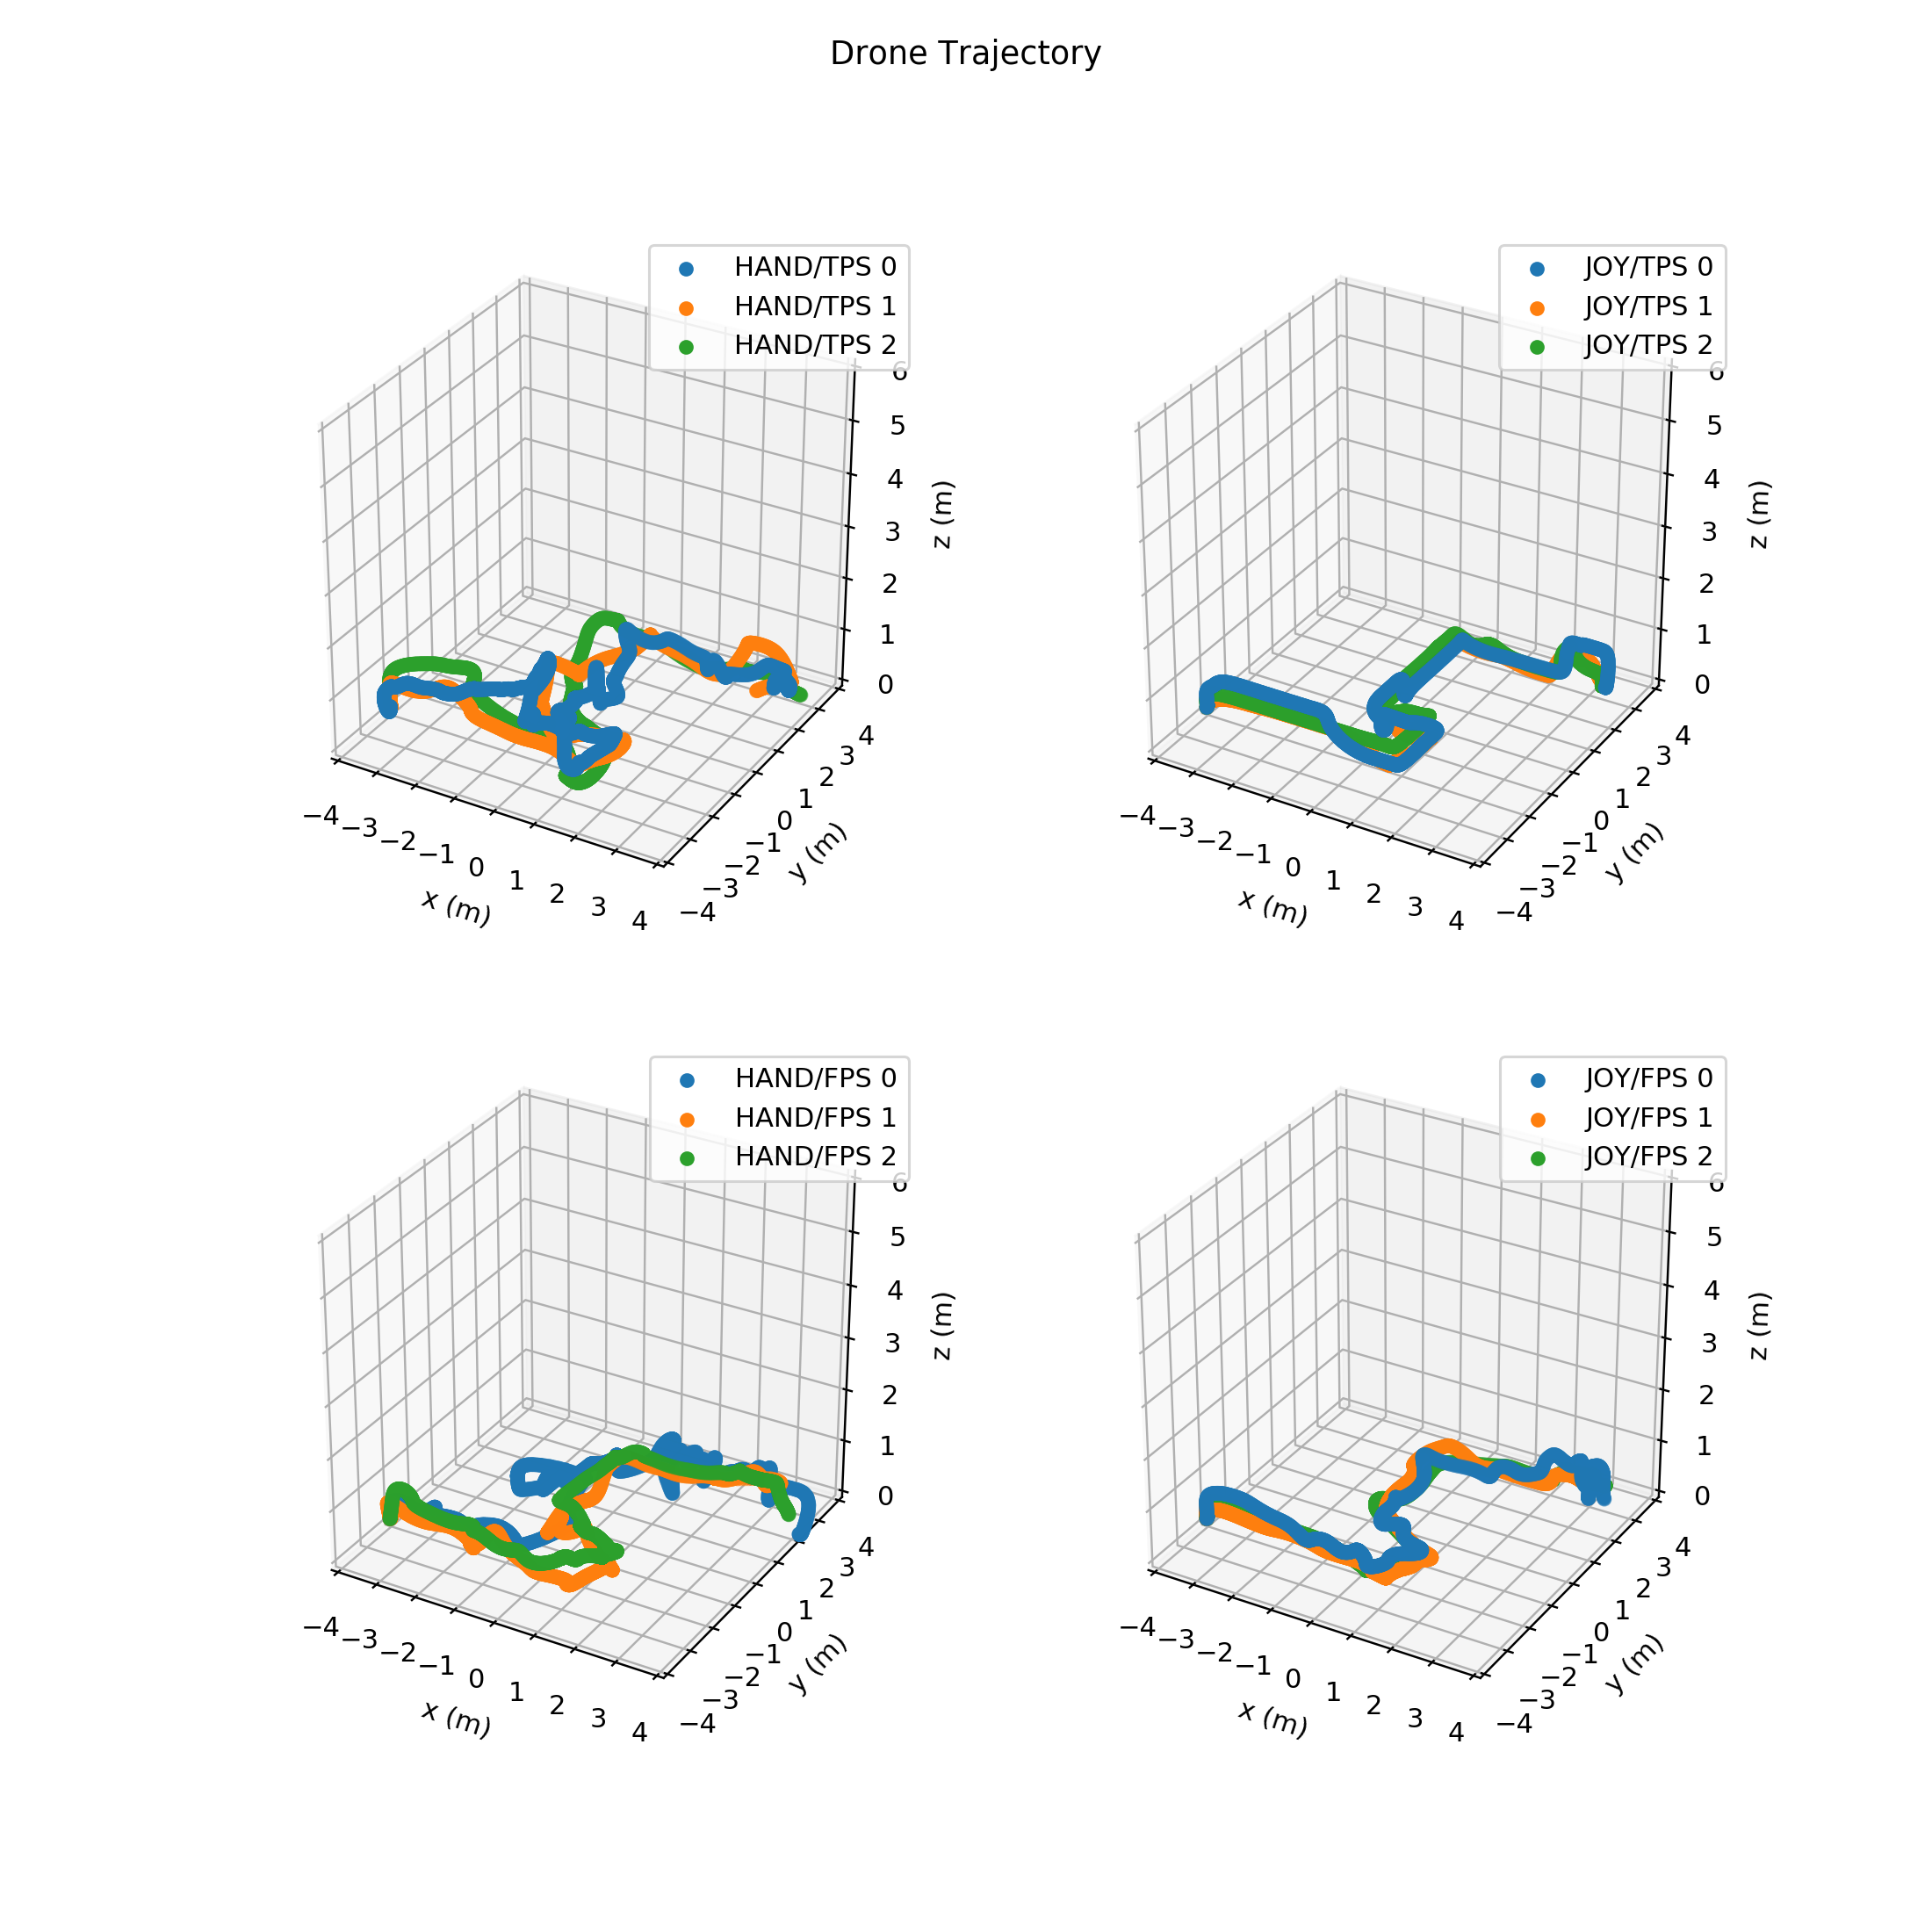

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
for i in range(len(hand_tps)):
    ax.scatter(hand_tps[i]['dronePosition.x'],hand_tps[i]['dronePosition.z'],hand_tps[i]['dronePosition.y'], label='HAND/TPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(222, projection='3d')
for i in range(len(controller_tps)):
    ax.scatter(controller_tps[i]['dronePosition.x'],controller_tps[i]['dronePosition.z'],controller_tps[i]['dronePosition.y'], label='JOY/TPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(223, projection='3d')
for i in range(len(hand_fps)):
    ax.scatter(hand_fps[i]['dronePosition.x'],hand_fps[i]['dronePosition.z'],hand_fps[i]['dronePosition.y'], label='HAND/FPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(224, projection='3d')
for i in range(len(controller_fps)):
    ax.scatter(controller_fps[i]['dronePosition.x'],controller_fps[i]['dronePosition.z'],controller_fps[i]['dronePosition.y'], label='JOY/FPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

fig.suptitle('Drone Trajectory')
plt.show()

<IPython.core.display.Javascript object>


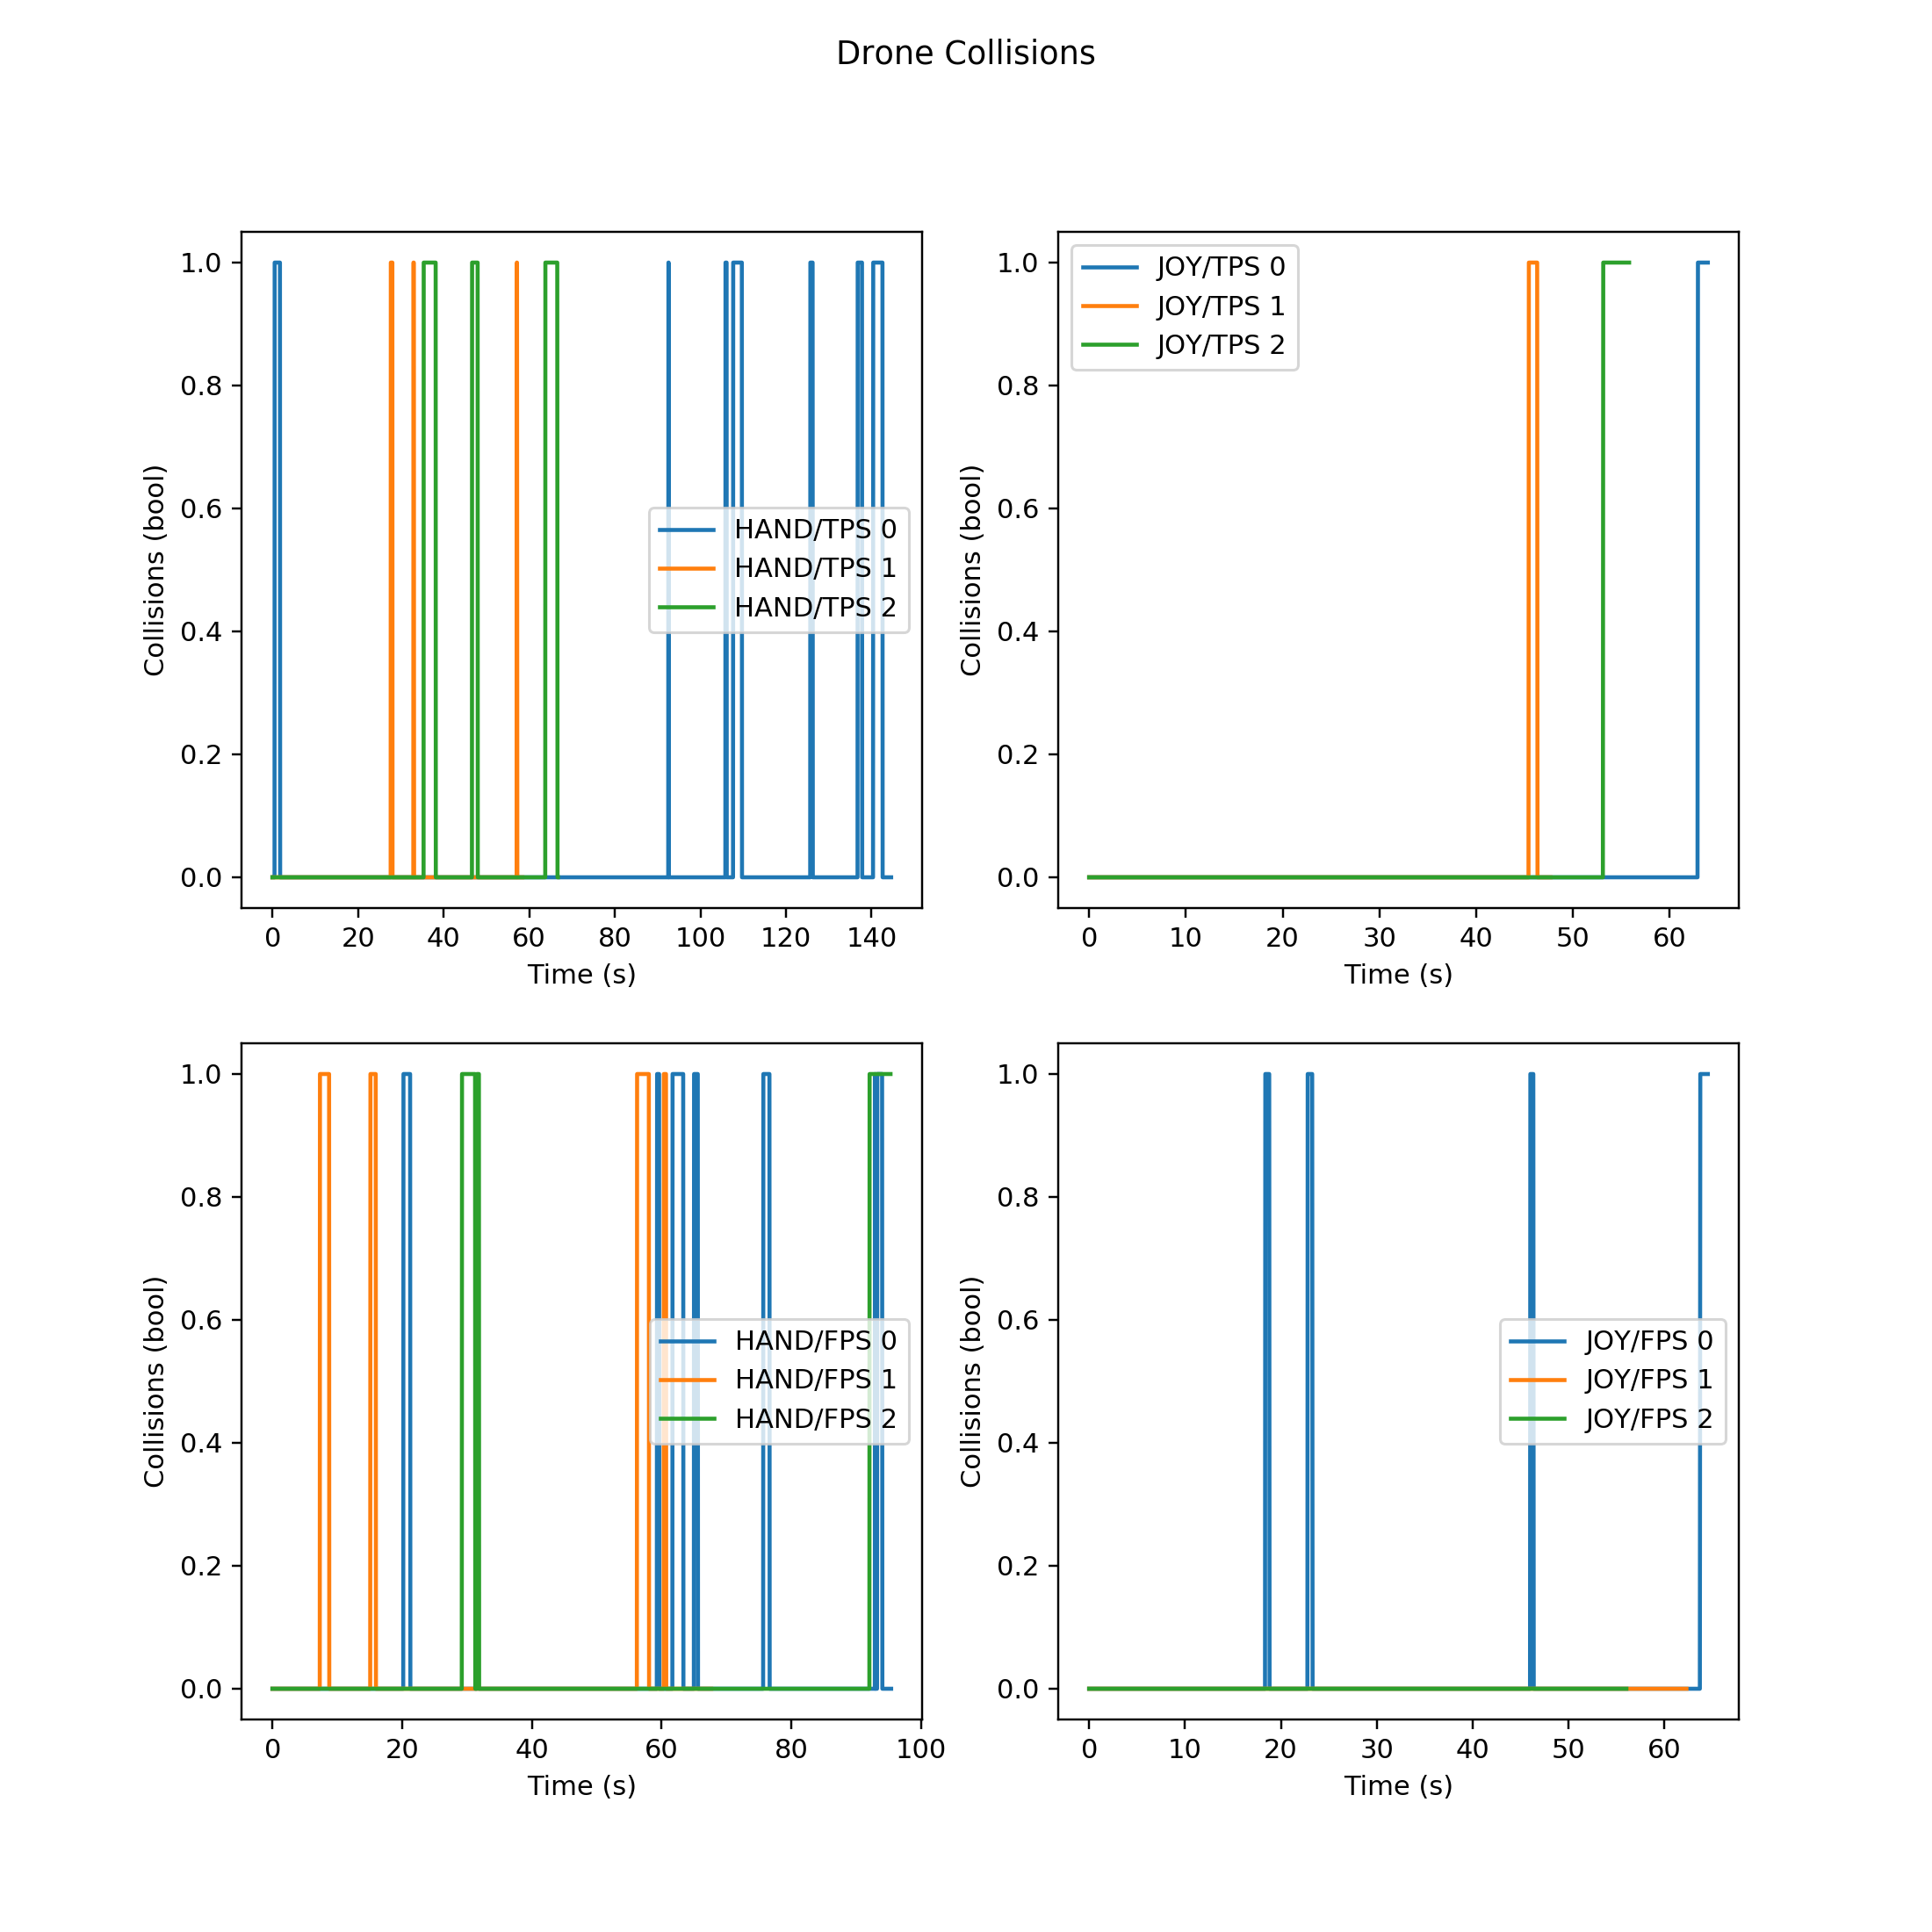

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
for i in range(len(hand_tps)):
    ax.plot(hand_tps[i]['absoluteTime'],hand_tps[i]['collision'], label='HAND/TPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(222)
for i in range(len(controller_tps)):
    ax.plot(controller_tps[i]['absoluteTime'],controller_tps[i]['collision'], label='JOY/TPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(223)
for i in range(len(hand_fps)):
    ax.plot(hand_fps[i]['absoluteTime'],hand_fps[i]['collision'], label='HAND/FPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(224)
for i in range(len(controller_fps)):
    ax.plot(controller_fps[i]['absoluteTime'],controller_fps[i]['collision'], label='JOY/FPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

fig.suptitle('Drone Collisions')
plt.show()

# Plots for the first experiment comparing the 3 easier paths with the remote controller and hand interface

In [7]:
path_to_folder = "./3_Paths/"
subjects = glob.glob(path_to_folder + "*/")

In [8]:
types = ["Controller_FPS_Path_1",
         "Controller_FPS_Path_2",
         "Controller_FPS_Path_3",
         "Controller_TPS_Path_1",
         "Controller_TPS_Path_2",
         "Controller_TPS_Path_3",
         "MotionCapture_FPS_Path_1",
         "MotionCapture_FPS_Path_2",
         "MotionCapture_FPS_Path_3",
         "MotionCapture_TPS_Path_1",
         "MotionCapture_TPS_Path_2",
         "MotionCapture_TPS_Path_3"]

logs = {}
for curr in types:
    logs[curr] = []

In [9]:
for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for idx,file in enumerate(files):
        for cur_type in types:
            # to take only file name without path and .json extension
            if os.path.basename(file)[:-5] == cur_type:
                with open(file) as f:
                    temp = []
                    for line in f:
                        temp.append(json.loads(line))
                df = pd.io.json.json_normalize(temp[0]['allLogs'])
                df.columns = df.columns.map(lambda x: x.split("*.")[-1])
                logs[cur_type].append(df)

./3_Paths/Timothee/
./3_Paths/Pseudo/
./3_Paths/Max/


In [10]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


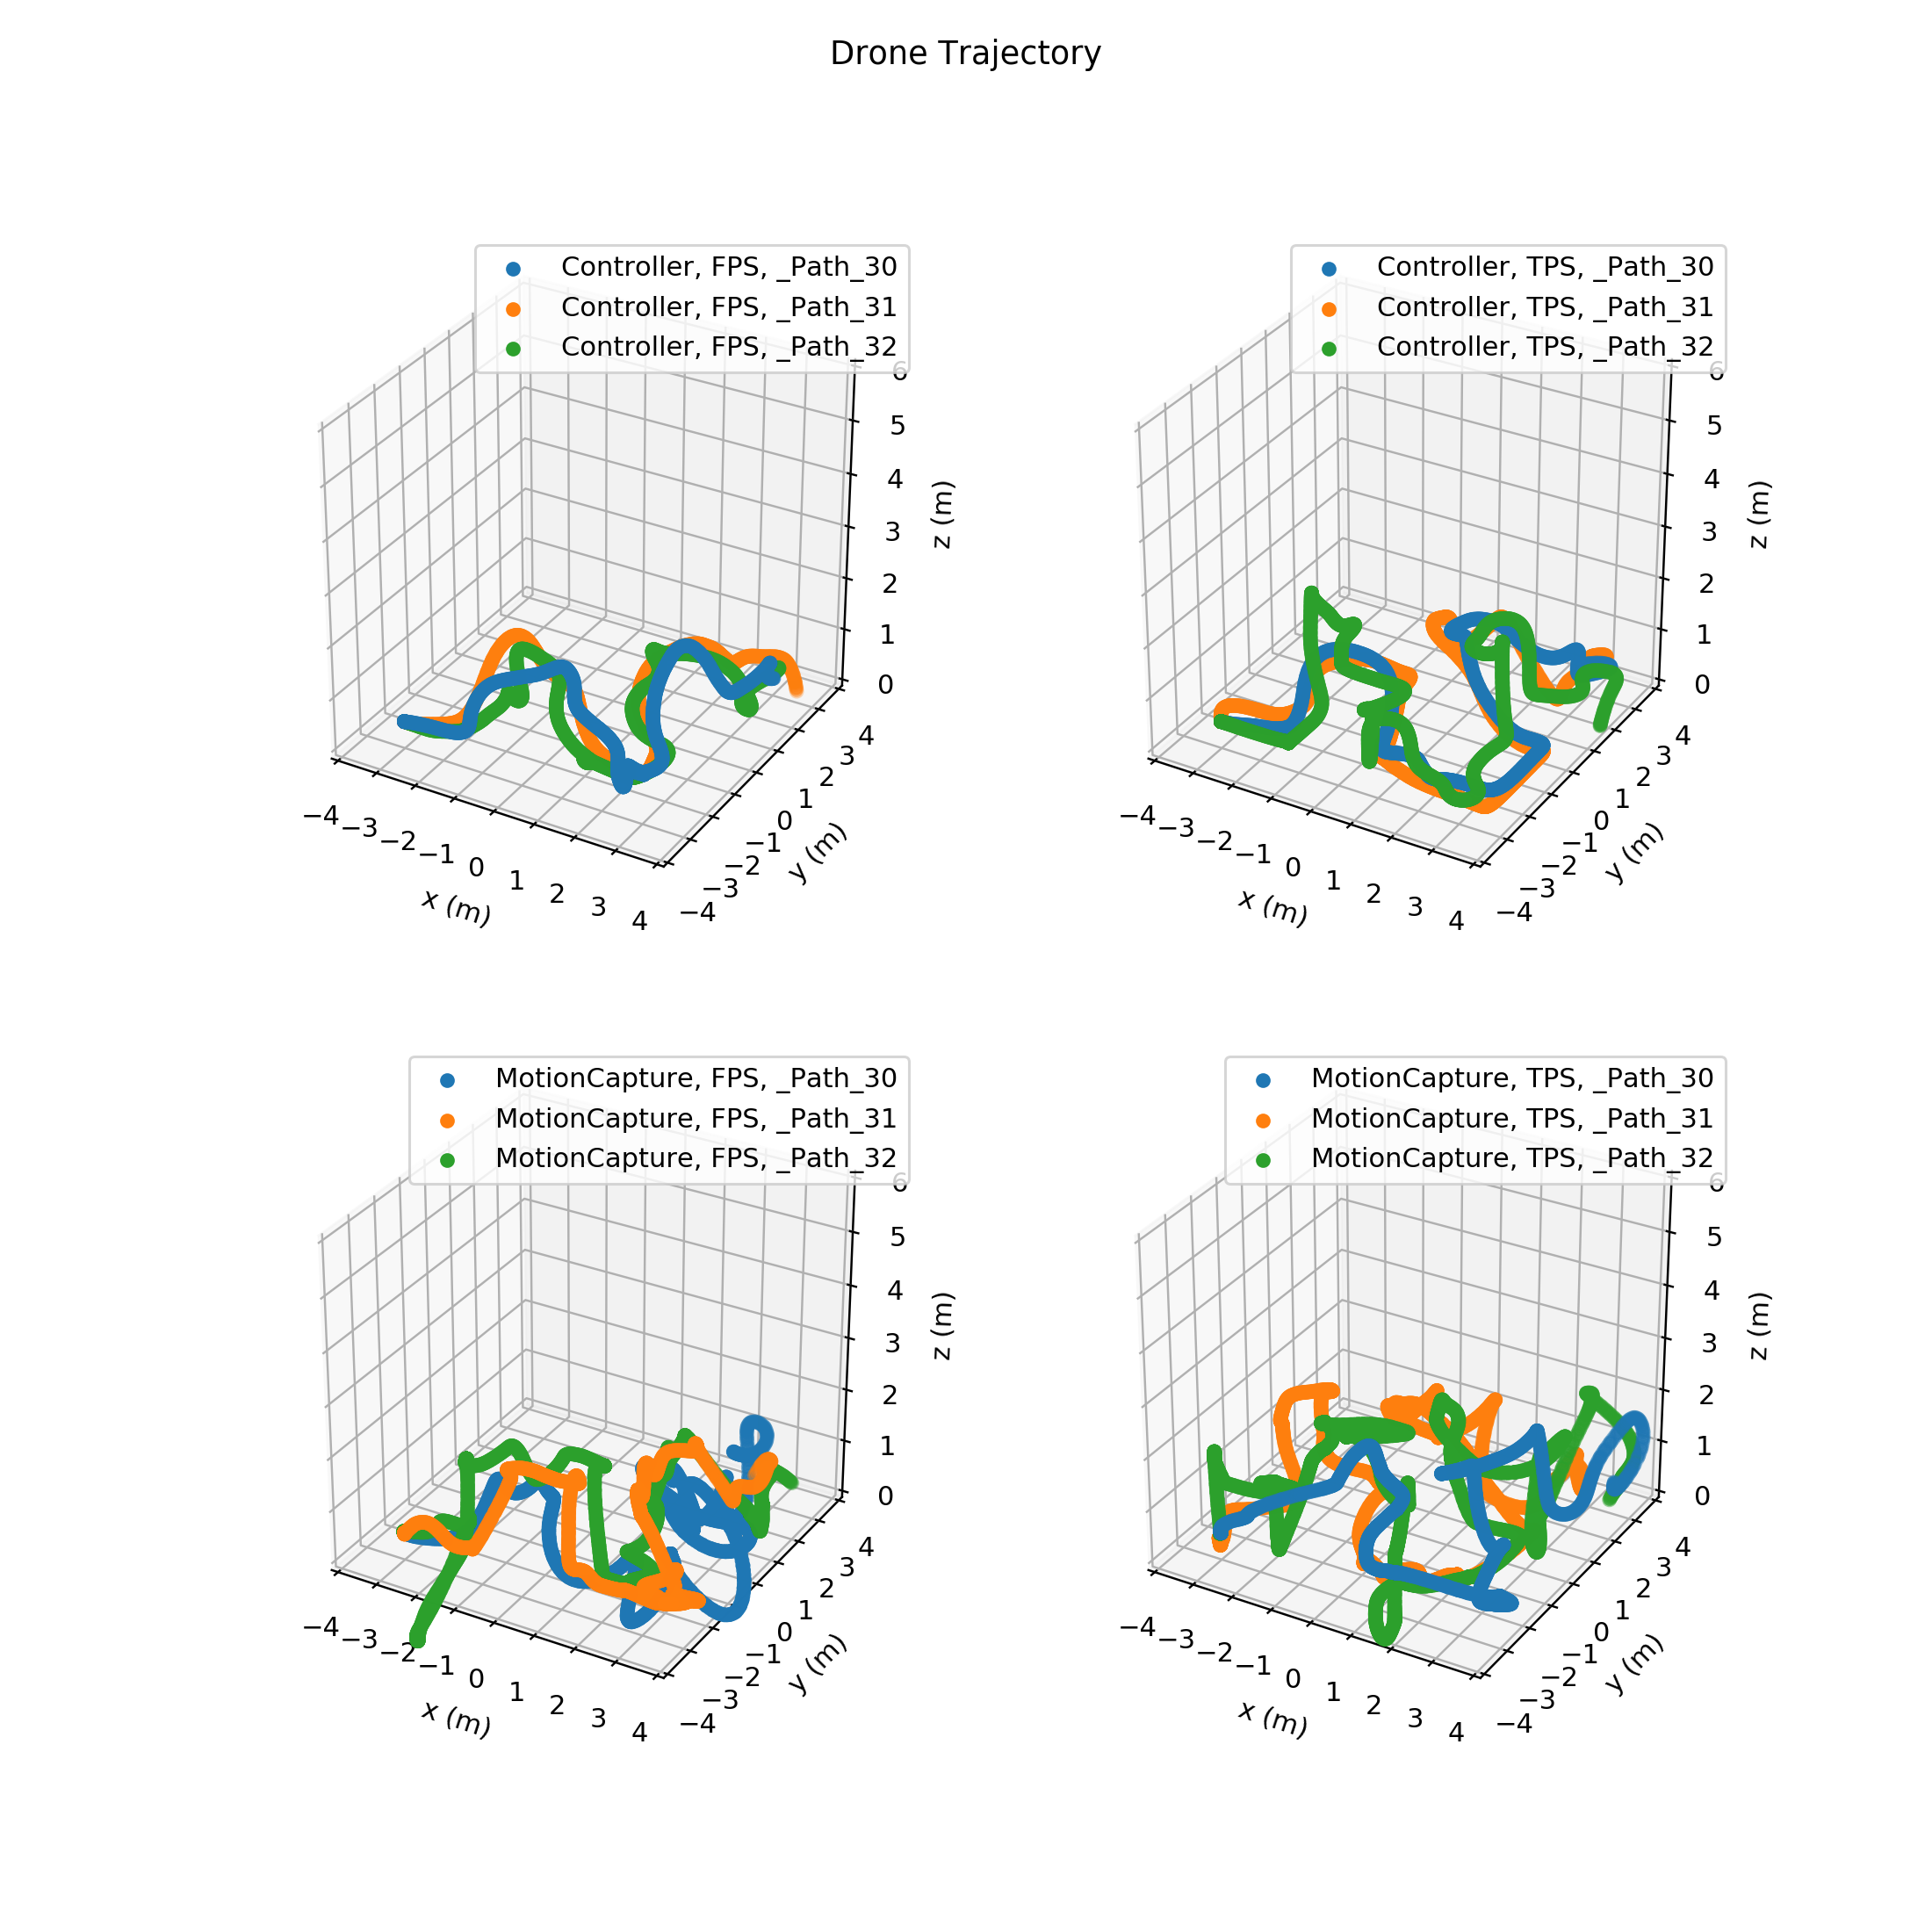

In [11]:
path = "_Path_3"
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(221, projection='3d')
for idx,log in enumerate(logs['Controller_FPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, FPS, '+path+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(222, projection='3d')
for idx,log in enumerate(logs['Controller_TPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, TPS, '+path+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(223, projection='3d')
for idx,log in enumerate(logs['MotionCapture_FPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, FPS, '+path+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(224, projection='3d')
for idx,log in enumerate(logs['MotionCapture_TPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, TPS, '+path+str(idx))
define_plot_pos(ax)

fig.suptitle('Drone Trajectory')
plt.show()

In [12]:
def define_plot_col(ax):
    plt.xlabel('Time (s)')
    plt.ylabel('Collisions (bool)')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


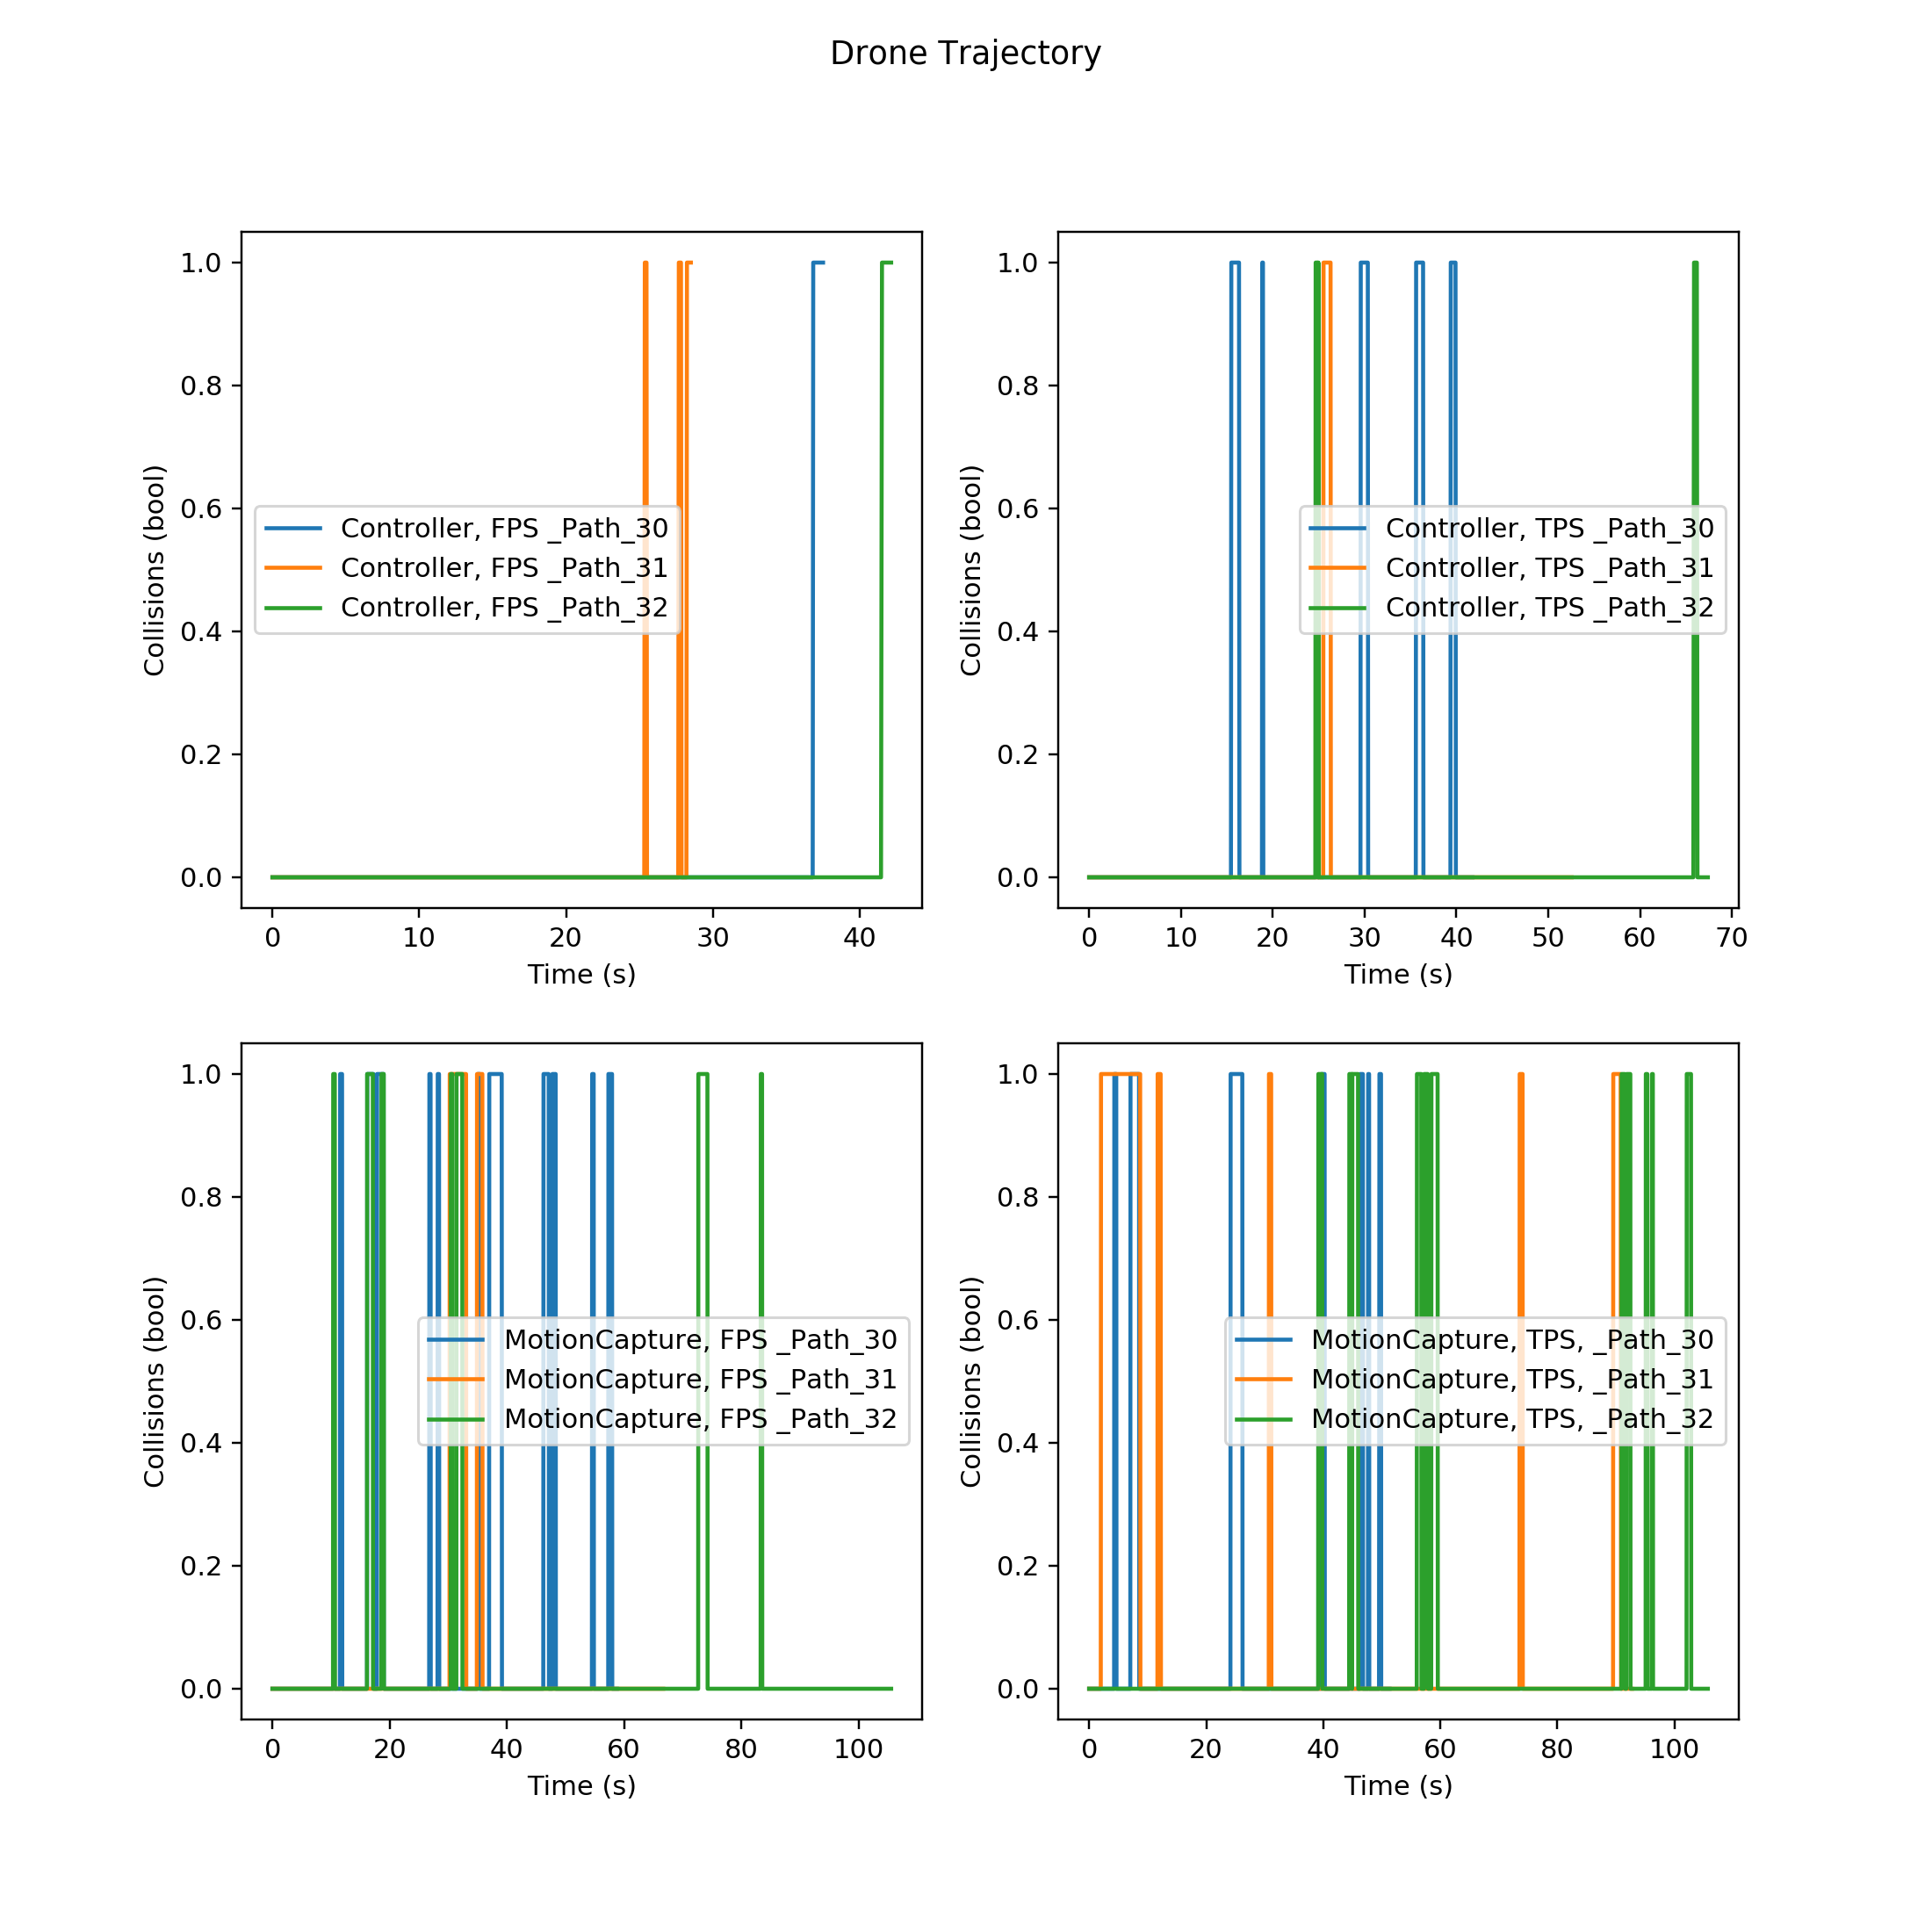

In [13]:
path = "_Path_3"
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(221)
for idx,log in enumerate(logs['Controller_FPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='Controller, FPS '+path+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(222)
for idx,log in enumerate(logs['Controller_TPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='Controller, TPS '+path+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(223)
for idx,log in enumerate(logs['MotionCapture_FPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='MotionCapture, FPS '+path+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(224)
for idx,log in enumerate(logs['MotionCapture_TPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='MotionCapture, TPS, '+path+str(idx))
define_plot_col(ax)

fig.suptitle('Drone Trajectory')
plt.show()

# Plots for the learning curve experiment

In [14]:
path_to_folder = "./Learning_Curve/"
subjects = glob.glob(path_to_folder + "*/")

types = ["Controller_First",
         "Controller_Last",
         "MotionCapture_First",
         "MotionCapture_Last"]

logs = {}
for curr in types:
    logs[curr] = []

In [15]:
for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for idx,file in enumerate(files):
        if ("FirstTry" in file and "MotionCapture" in file):
            curtype = types[2]
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            logs[curtype].append(df)
        elif ("LastTry" in file and "MotionCapture" in file):
            curtype = types[3]
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            logs[curtype].append(df)
        elif ("FirstTry" in file and "Controller" in file):
            curtype = types[0]
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            logs[curtype].append(df)
        elif ("LastTry" in file and "Controller" in file):
            curtype = types[1]
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            logs[curtype].append(df)

./Learning_Curve/Alexandre/
./Learning_Curve/Thomus/
./Learning_Curve/Gybran/
./Learning_Curve/Ulysse/
./Learning_Curve/Jacques/
./Learning_Curve/Lucas/
./Learning_Curve/Thibault/


In [16]:
logs["Controller_First"][0].head()

,absoluteTime,clutch,collision,controlPosition.x,controlPosition.y,controlPosition.z,controlSpeed.x,controlSpeed.y,controlSpeed.z,desiredYawRate,...,droneSpeed.x,droneSpeed.y,droneSpeed.z,mocapPosition.x,mocapPosition.y,mocapPosition.z,mocapQuaternion.w,mocapQuaternion.x,mocapQuaternion.y,mocapQuaternion.z
0,0.000000,False,False,-3.0,0.4,-3.0,0.0,0.0,0.0,0.0,...,0.0,1.490116e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020000,False,False,-3.0,0.4,-3.0,0.0,0.0,0.0,0.0,...,0.0,1.490116e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.120000,False,False,-3.0,0.4,-3.0,0.0,0.0,0.0,0.0,...,0.0,3.278255e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.138184,False,False,-3.0,0.4,-3.0,0.0,0.0,0.0,0.0,...,0.0,3.278255e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.155036,False,False,-3.0,0.4,-3.0,0.0,0.0,0.0,0.0,...,0.0,3.576279e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#filter values before first obstacle and after last (filter with x and z) to compare comparable times. Plot same as before.

# Get the mean response time for tactile experiment

In [18]:
folder = "../../Bidirectional_Interface/Bidirectional_interface/Haptics/Experiment_Tactile/results_time/"
files = [i for i in glob.glob(folder+"*.csv")]
combined_csv = pd.concat([pd.read_csv(f, dtype=float).transpose() for f in files ], sort=False)
combined_csv.columns = ['times']
print("total number of trials : ", len(combined_csv.times))
print("Mean reaction time :", combined_csv.times.astype(float).mean(),"s")

total number of trials :  100
Mean reaction time : 0.4485572671890259 s


# Get the error rate of the identification of motors

In [19]:
folder = "../../Bidirectional_Interface/Bidirectional_interface/Haptics/Experiment_Tactile/results_identification/"
files = [i for i in glob.glob(folder+"*.csv")]
combined_csv = pd.concat([pd.read_csv(f, index_col=False).transpose() for f in files ], sort=False)
combined_csv.columns = ['subjects','ground_truth']
combined_csv.head()

,subjects,ground_truth
0,backObstacle,backObstacle
1,upObstacle,upObstacle
2,backObstacle,backObstacle
3,rightObstacle,rightObstacle
4,backObstacle,backObstacle


In [20]:
mask = combined_csv.subjects == combined_csv.ground_truth
print("total number of trials : ", len(combined_csv.index))
print("The percentage of correct answer is : ", np.sum(mask)*100/len(combined_csv.index),"%")

total number of trials :  100
The percentage of correct answer is :  98.0 %
